# Temat

Opisz działanie testu pierwszości Millera-Rabina i zaimplementuj go. W przypadku, gdy
ten test zwróci <b>FALSE</b> mamy pewność, że dana liczba jest złożona - wyjaśnij dlaczego.
Przedstaw działanie testu Millera-Rabina na losowo wygenerowanych liczbach nie mniejszych
od 105
(wykorzystaj wbudowaną funkcję do generowania liczb pseudolosowych). Wykonaj
ten test tyle razy, by prawdopodobieństwo błędu było mniejsze od 10−6
. Przykłady wykonaj
za pomocą programu SageMath. Część informacji na ten temat znajdziesz w rozdziale 2.4
książki https://wstein.org/ent/ent.pdf


In [ ]:
DEFAULT_NUMBER_BOUND = (105, 10**6)
DEFAULT_TESTS = 10
DEFAULT_MAX_PROBABILITY = 10^-6

## Side Code

In [ ]:
import sys
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display

## What is Miller-Rabin Test?

Algorytm Millera–Rabina to probabilistyczny test pierwszości, służący do sprawdzania, czy dana liczba całkowita n > 2 jest prawdopodobnie pierwsza. W odróżnieniu od deterministycznych metod (np. testu dzielenia przez wszystkie możliwe dzielniki), MR pozwala na bardzo szybkie odrzucanie liczb złożonych z bardzo wysokim prawdopodobieństwem.

### Idea ogólna

1. Dla liczby nieparzystej `n`, zapisujemy `n-1` w postaci:

    $$
     n - 1 = 2^r \cdot d,\quad d\text{ nieparzyste}.
    $$

2. Wybieramy losową bazę `a` z przedziału \([2, n-2]\) i obliczamy

   $$
     x = a^d \bmod n.
   $$

3. Jeśli `x == 1` lub `x == n-1`, uważamy, że `a` nie obala pierwszości `n` i idziemy do następnej rundy.  
4. W przeciwnym razie wykonujemy **s-1** iteracji:  
   - `x = x^2 mod n`  
   - Jeśli `x == n-1`, uznajemy rundę za bezpieczną i przechodzimy dalej.  
5. Jeżeli w żadnym kroku `x` nie osiągnęło wartości `n-1`, to `a` jest świadkiem złożoności i `n` jest złożona.

Powtarzamy test dla **k** różnych, losowych baz. Jeśli żadna runda nie wykryje złożoności, uznajemy `n` za **prawdopodobnie pierwszą**.

---

## Implementation

### Miller-Rabin Test

#### SageMath

In [ ]:
def millerRabinTest(n, k=DEFAULT_NUMBER_BOUND):
    """
    Silny test Millera–Rabina:
    - n: liczba do sprawdzenia
    - k: liczba rund (im więcej, tym mniejsze prawodopodobieństwo błędu)
    Zwraca True, jeśli n jest prawdopodobnie pierwsze; False, jeśli stwierdzono złożoność.
    """
    n = Integer(n)
    # 1) Proste przypadki
    if n < 2:
        return False         # wszystko < 2 nie jest pierwsze
    if n in [2, 3]:
        return True          # 2 i 3 są pierwsze
    if n % 2 == 0:
        return False         # parzyste > 2 są złożone

    # 2) podział n-1 = 2^r * d
    r = (n-1).valuation(2)
    d = (n-1) // 2^r

    # 3) k rund testu
    for _ in range(k):
        a = randint(2, n - 2)    # losowa baza a ∈ [2, n-2]
        x = power_mod(a, d, n)   # a^d mod n (wbudowane potęgowanie modularne)

        # 4) Jeśli od razu 1 lub n-1, baza nic nie obala
        if x == 1 or x == n - 1:
            continue

        # 5) Sprawdzanie kolejnych kwadratów:
        #    Powtarzamy r-1 razy: x = x^2 mod n.
        #    Jeśli kiedykolwiek x == n-1, ta baza przechodzi test.
        for _ in range(r - 1):
            x = power_mod(x, 2, n)
            if x == n - 1:
                break
        else:
            # pętla wykonała się bez break → świadek złożoności
            return False
        
    return True

#### Python

In [ ]:
from random import randint

def millerRabinTestPython(n, k=DEFAULT_NUMBER_BOUND):
    """
    Silny test Millera–Rabina w czystym Pythonie:
    - n: liczba do sprawdzenia
    - k: liczba rund (im więcej, tym mniejsze P_błąd)
    Zwraca True, jeśli n jest prawdopodobnie pierwsze; False, jeśli wykryto złożoność.
    """

    # 1) Obsługa małych i parzystych
    if n < 2:
        return False         # wszystko < 2 nie jest pierwsze
    if n in (2, 3):
        return True          # 2 i 3 są pierwsze
    if n % 2 == 0:
        return False         # wszystkie inne parzyste są złożone

    # 2) Rozkład n-1 = 2^r * d, z nieparzystym d
    r, d = 0, n - 1
    while d % 2 == 0:
        d //= 2
        r += 1
    # teraz n-1 = 2^r * d

    # 3) k rund testu
    for _ in range(k):
        a = randint(2, n - 2)    # losowa baza a ∈ [2, n-2]
        x = pow(a, d, n)         # a^d mod n (wbudowane potęgowanie modularne)

        # 4) Jeśli od razu 1 lub n-1, baza nic nie obala
        if x == 1 or x == n - 1:
            continue

        # 5) Sprawdzanie kolejnych kwadratów:
        #    Powtarzamy r-1 razy: x = x^2 mod n.
        #    Jeśli kiedykolwiek x == n-1, ta baza przechodzi test.
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            # pętla wykonała się bez break → świadek złożoności
            return False

    # 6) Jeśli żadna baza nie wykryła złożoności → prawdopodobnie pierwsza
    return True

### Miller-Rabin Test Probability
Probability is size of number factors divided by set of numbers that you can chose from [2, n-2] numbers soo n - 2 numbers


<b> [TODO] Explain why this codes </b>


In [ ]:
def probabilityOfMillerRabinTest(number, tests):
  if (number < 2): raise ValueError("number can't be less then 3")
  factors = [a for a, _ in factor(number)]
  probability = len(factors)/((number - 2)**tests)
  return probability

In [ ]:
def testsOfMillerRabinTestToSatisfyProbability(number, probability):
  factors = [a for a, _ in factor(number)]
  tests = math.log(len(factors) / probability) / math.log(number - 2)
  return math.ceil(tests)

<b>[TODO] explain this estimations</b>

In [ ]:
def estimatedProbabilityForMillerRabinTest(tests):
  return (1/4)**tests

In [ ]:
def estimatedTestForMillerRabinTestToSatisfyProbability(probability):
    if not (0 < probability < 1): raise ValueError("probability must be is (0,1)")
    tests = math.log(1/probability, 4)
    return math.ceil(tests)

## Random Number Test

In [ ]:
NUMBER = randint(DEFAULT_NUMBER_BOUND[0], DEFAULT_NUMBER_BOUND[1])
TESTS = DEFAULT_TESTS
PROBABILITY = DEFAULT_MAX_PROBABILITY

### Test if number is prime

In [ ]:
print("Number:", NUMBER)
print("Tests:", TESTS)

result = millerRabinTest(NUMBER, TESTS)
print("Is Prime?:", result)

Number: 265104
Tests: 10
Is Prime?: False


### Calculate probability for number and tests

In [ ]:
probability = probabilityOfMillerRabinTest(NUMBER, TESTS)
estimated_probability = estimatedProbabilityForMillerRabinTest(TESTS)

print("Probability:" ,N(probability))
print("Estimated probability:" , N(estimated_probability))
print("Is probability less then estimated?", probability < estimated_probability)

Probability: 2.33308171252445e-54
Estimated probability: 9.53674316406250e-7
Is probability less then estimated? True


### Calculate tests for number and probability

In [ ]:
tests = testsOfMillerRabinTestToSatisfyProbability(NUMBER, PROBABILITY)
estimated_tests = estimatedTestForMillerRabinTestToSatisfyProbability(PROBABILITY)
print("Tests:", tests)
print("Estimated Tests:", estimated_tests)
print("Are tests less then estimated tests?", tests < estimated_tests)

Tests: 2
Estimated Tests: 10
Are tests less then estimated tests? True


## Chart of that number is prime by tests

In [ ]:
# Probability to number
NUMBER_BOUND = (10**2, 10**6)
NUMBER_STEP = 10**2
PROBABILITY = 10**-10
TESTS = 1
# Tests to probability
PROBABILITY_BOUND = (10**-10, 10**-9)
PROBABILITY_STEP = 10**-10
# Probability to tests
TESTS_BOUND = (10**2, 10**6)
TESTS_STEP = 10**2

### Calculate Data and drawGraph function

In [ ]:
number = []
probability = []
tests = []

i = NUMBER_BOUND[0]
while i <= NUMBER_BOUND[1]:
  number.append(i)
  probability.append(probabilityOfMillerRabinTest(i, TESTS))
  tests.append(testsOfMillerRabinTestToSatisfyProbability(i, PROBABILITY))
  i += NUMBER_STEP

In [ ]:
probability_values = []
estimated_tests = []

i = PROBABILITY_BOUND[0]
while i <= PROBABILITY_BOUND[1]:
  probability_values.append(i)
  estimated_tests.append(estimatedTestForMillerRabinTestToSatisfyProbability(i))
  i += PROBABILITY_STEP

In [ ]:
test_values = []
estimated_probability = []

i = TESTS_BOUND[0]
while i <= TESTS_BOUND[1]:
  test_values.append(i)
  estimated_probability.append(estimatedProbabilityForMillerRabinTest(i))
  i += TESTS_STEP

In [ ]:
def drawGraph():
  fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 2 rows, 2 columns

  axes[0, 0].plot(number, probability, linestyle='-', marker='o', color='blue')
  axes[0, 0].set_title(f"Probability for Number in {TESTS} tests of Miller-Rabin Test")
  axes[0, 0].set_xlabel("Number")
  axes[0, 0].set_ylabel("Probability")
  axes[0, 0].grid(True)

  axes[0, 1].plot(number, tests, linestyle='-', marker='o', color='green')
  axes[0, 1].set_title(f"Tests for Number of Miller-Rabin that satisfy {PROBABILITY} probability")
  axes[0, 1].set_xlabel("Number")
  axes[0, 1].set_ylabel("Tests")
  axes[0, 1].grid(True)

  axes[1, 0].plot(test_values, estimated_probability, linestyle='-', marker='o', color='red')
  axes[1, 0].set_title("Estimated Probability for Tests of Miller-Rabin Test")
  axes[1, 0].set_xlabel("Tests")
  axes[1, 0].set_ylabel("Probability")
  axes[1, 0].grid(True)

  axes[1, 1].plot(probability_values, estimated_tests, linestyle='-', marker='o', color='purple')
  axes[1, 1].set_title("Estimated Tests for Probability of Miller-Rabin")
  axes[1, 1].set_xlabel("Probability")
  axes[1, 1].set_ylabel("Tests")
  axes[1, 1].grid(True)

  plt.tight_layout()  # Adjust spacing between subplots
  plt.show()


### Draw Graph


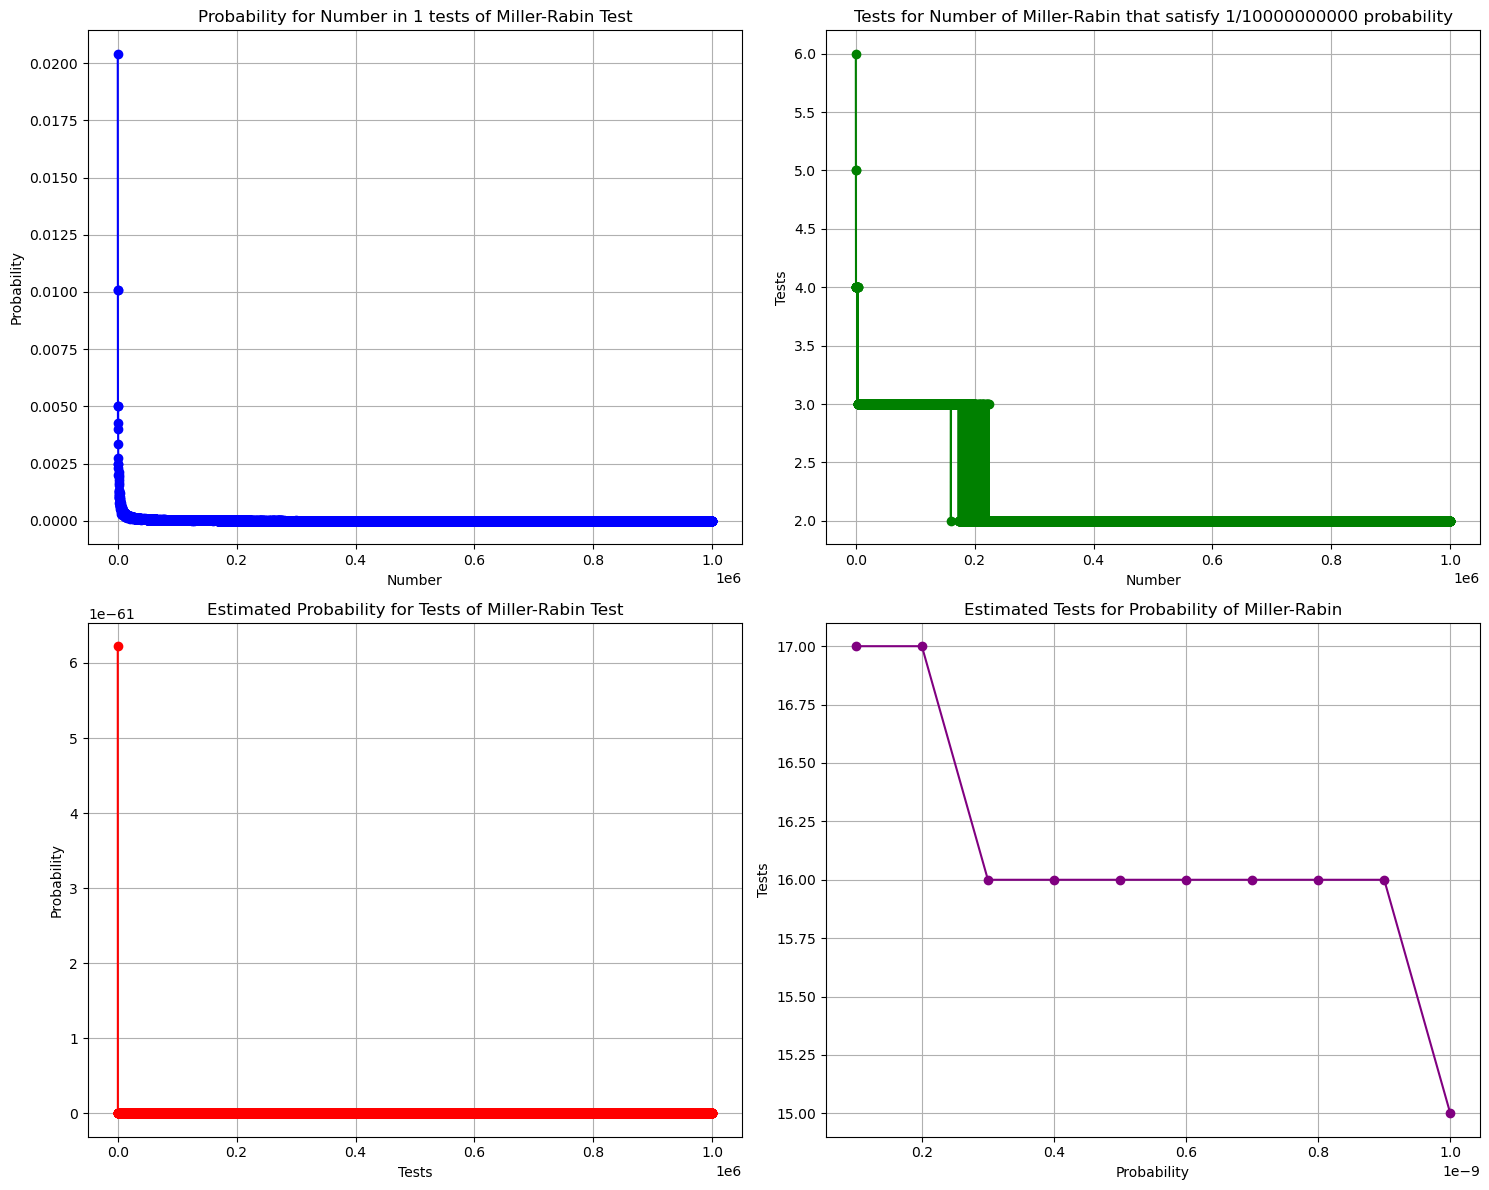

In [ ]:
drawGraph()